In [ ]:
pip install hdbscan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import hdbscan
from sklearn.metrics import (silhouette_score, davies_bouldin_score, adjusted_rand_score, v_measure_score,
                              calinski_harabasz_score, fowlkes_mallows_score, adjusted_mutual_info_score)
from sklearn.decomposition import PCA
import seaborn as sns

# Datasets
from sklearn.datasets import make_moons
from sklearn.datasets import load_wine



In [ ]:
def compute_metrics(scaled_data, hdbscan_labels, true_labels):
    if len(np.unique(hdbscan_labels)) > 1:
        metrics = {
            "Adjusted Rand Index": adjusted_rand_score(true_labels, hdbscan_labels),
            "Silhouette Score": silhouette_score(scaled_data, hdbscan_labels),
            "V-measure": v_measure_score(true_labels, hdbscan_labels),
            "Davies-Bouldin Score": davies_bouldin_score(scaled_data, hdbscan_labels),
            "Calinski-Harabasz Score": calinski_harabasz_score(scaled_data, hdbscan_labels),
            "Fowlkes-Mallows Score": fowlkes_mallows_score(true_labels, hdbscan_labels),
            "Adjusted Mutual Info": adjusted_mutual_info_score(true_labels, hdbscan_labels)
        }
    else:
        metrics = {
            "Adjusted Rand Index": None,
            "Silhouette Score": None,
            "V-measure": None,
            "Davies-Bouldin Score": None,
            "Calinski-Harabasz Score": None,
            "Fowlkes-Mallows Score": None,
            "Adjusted Mutual Info": None
        }

    return metrics


## Wine Dataset


In [ ]:
data = load_wine()
X_wine = data.data
true_labels = data.target

# Standardize the data
scaler = MinMaxScaler()
wine_scaled = scaler.fit_transform(X_wine)

# PCA
pca = PCA(n_components=2)
wine_reduced = pca.fit_transform(wine_scaled)


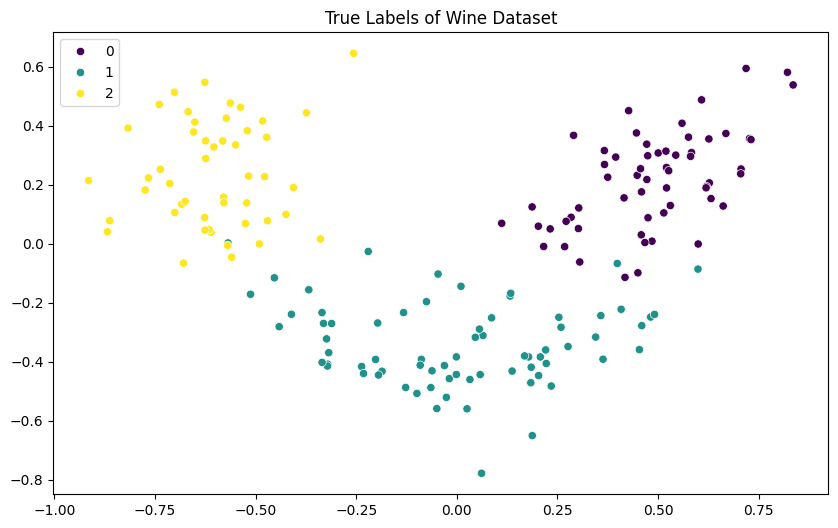

In [ ]:
# Visualize the true labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=wine_reduced[:, 0], y=wine_reduced[:, 1], hue=true_labels, palette='viridis', legend='full')
plt.title('True Labels of Wine Dataset')
plt.show()


In [ ]:
# Experimenting with min_samples
min_cluster_size = 10  # Set min_cluster_size to 10
min_samples_values = [5, 10, 15, 20, 25]

results = []

for min_samples in min_samples_values:
    hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size,
                                     min_samples=min_samples)
    labels = hdbscan_model.fit_predict(wine_reduced)

    # Compute the metrics for this combination
    metrics = compute_metrics(wine_reduced, labels, true_labels)

    results.append({
        'min_cluster_size': min_cluster_size,
        'min_samples': min_samples,
        **metrics
    })

results_min_samples = pd.DataFrame(results)
results_min_samples = results_min_samples.sort_values(by='Adjusted Rand Index', ascending=False)

# Print the DataFrame with all combinations and their metrics
results_min_samples.head()

,min_cluster_size,min_samples,Adjusted Rand Index,Silhouette Score,V-measure,Davies-Bouldin Score,Calinski-Harabasz Score,Fowlkes-Mallows Score,Adjusted Mutual Info
0,10,5,0.646833,0.382456,0.660143,1.607856,106.272986,0.756891,0.655317
2,10,15,0.425214,0.269093,0.547525,1.487142,77.605599,0.599179,0.541066
1,10,10,0.395076,0.249836,0.530729,1.386194,76.607832,0.579282,0.523996
3,10,20,0.349496,0.220201,0.471946,1.544322,63.859705,0.548124,0.464347
4,10,25,0.294125,0.228909,0.380973,1.964953,56.293929,0.554361,0.374097


In [ ]:
# Experimenting with min_cluster_size
min_cluster_size_values = [5, 10, 15, 20, 25]
min_samples = 5  # Set min_samples to 5

results = []

for min_cluster_size in min_cluster_size_values:
    hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size,
                                     min_samples=min_samples)
    labels = hdbscan_model.fit_predict(wine_reduced)

    metrics = compute_metrics(wine_reduced, labels, true_labels)

    results.append({
        'min_cluster_size': min_cluster_size,
        'min_samples': min_samples,
        **metrics
    })

results_min_cluster_size = pd.DataFrame(results)
results_min_cluster_size = results_min_cluster_size.sort_values(by='Adjusted Rand Index', ascending=False)

results_min_cluster_size.head()

,min_cluster_size,min_samples,Adjusted Rand Index,Silhouette Score,V-measure,Davies-Bouldin Score,Calinski-Harabasz Score,Fowlkes-Mallows Score,Adjusted Mutual Info
1,10,5,0.646833,0.382456,0.660143,1.607856,106.272986,0.756891,0.655317
2,15,5,0.646833,0.382456,0.660143,1.607856,106.272986,0.756891,0.655317
3,20,5,0.646833,0.382456,0.660143,1.607856,106.272986,0.756891,0.655317
4,25,5,0.646833,0.382456,0.660143,1.607856,106.272986,0.756891,0.655317
0,5,5,0.447983,0.142609,0.548510,1.479370,50.174860,0.608785,0.538351


In [ ]:
# Identify best parameters combination
min_cluster_size_range = [5, 10, 15, 20, 25, 30]
min_samples_range = [5, 10, 15, 20]

best_ari = -np.inf
best_params = {}

for min_cluster_size in min_cluster_size_range:
    for min_samples in min_samples_range:
        hdbscan_model = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size)
        hdbscan_labels = hdbscan_model.fit_predict(wine_reduced)

        ari_score = adjusted_rand_score(true_labels, hdbscan_labels)

        if ari_score > best_ari:
            best_ari = ari_score
            best_params = {'min_cluster_size': min_cluster_size, 'min_samples': min_samples}

print(f"Best parameters: {best_params} with ARI score: {best_ari:.2f}")


Best parameters: {'min_cluster_size': 10, 'min_samples': 5} with ARI score: 0.65


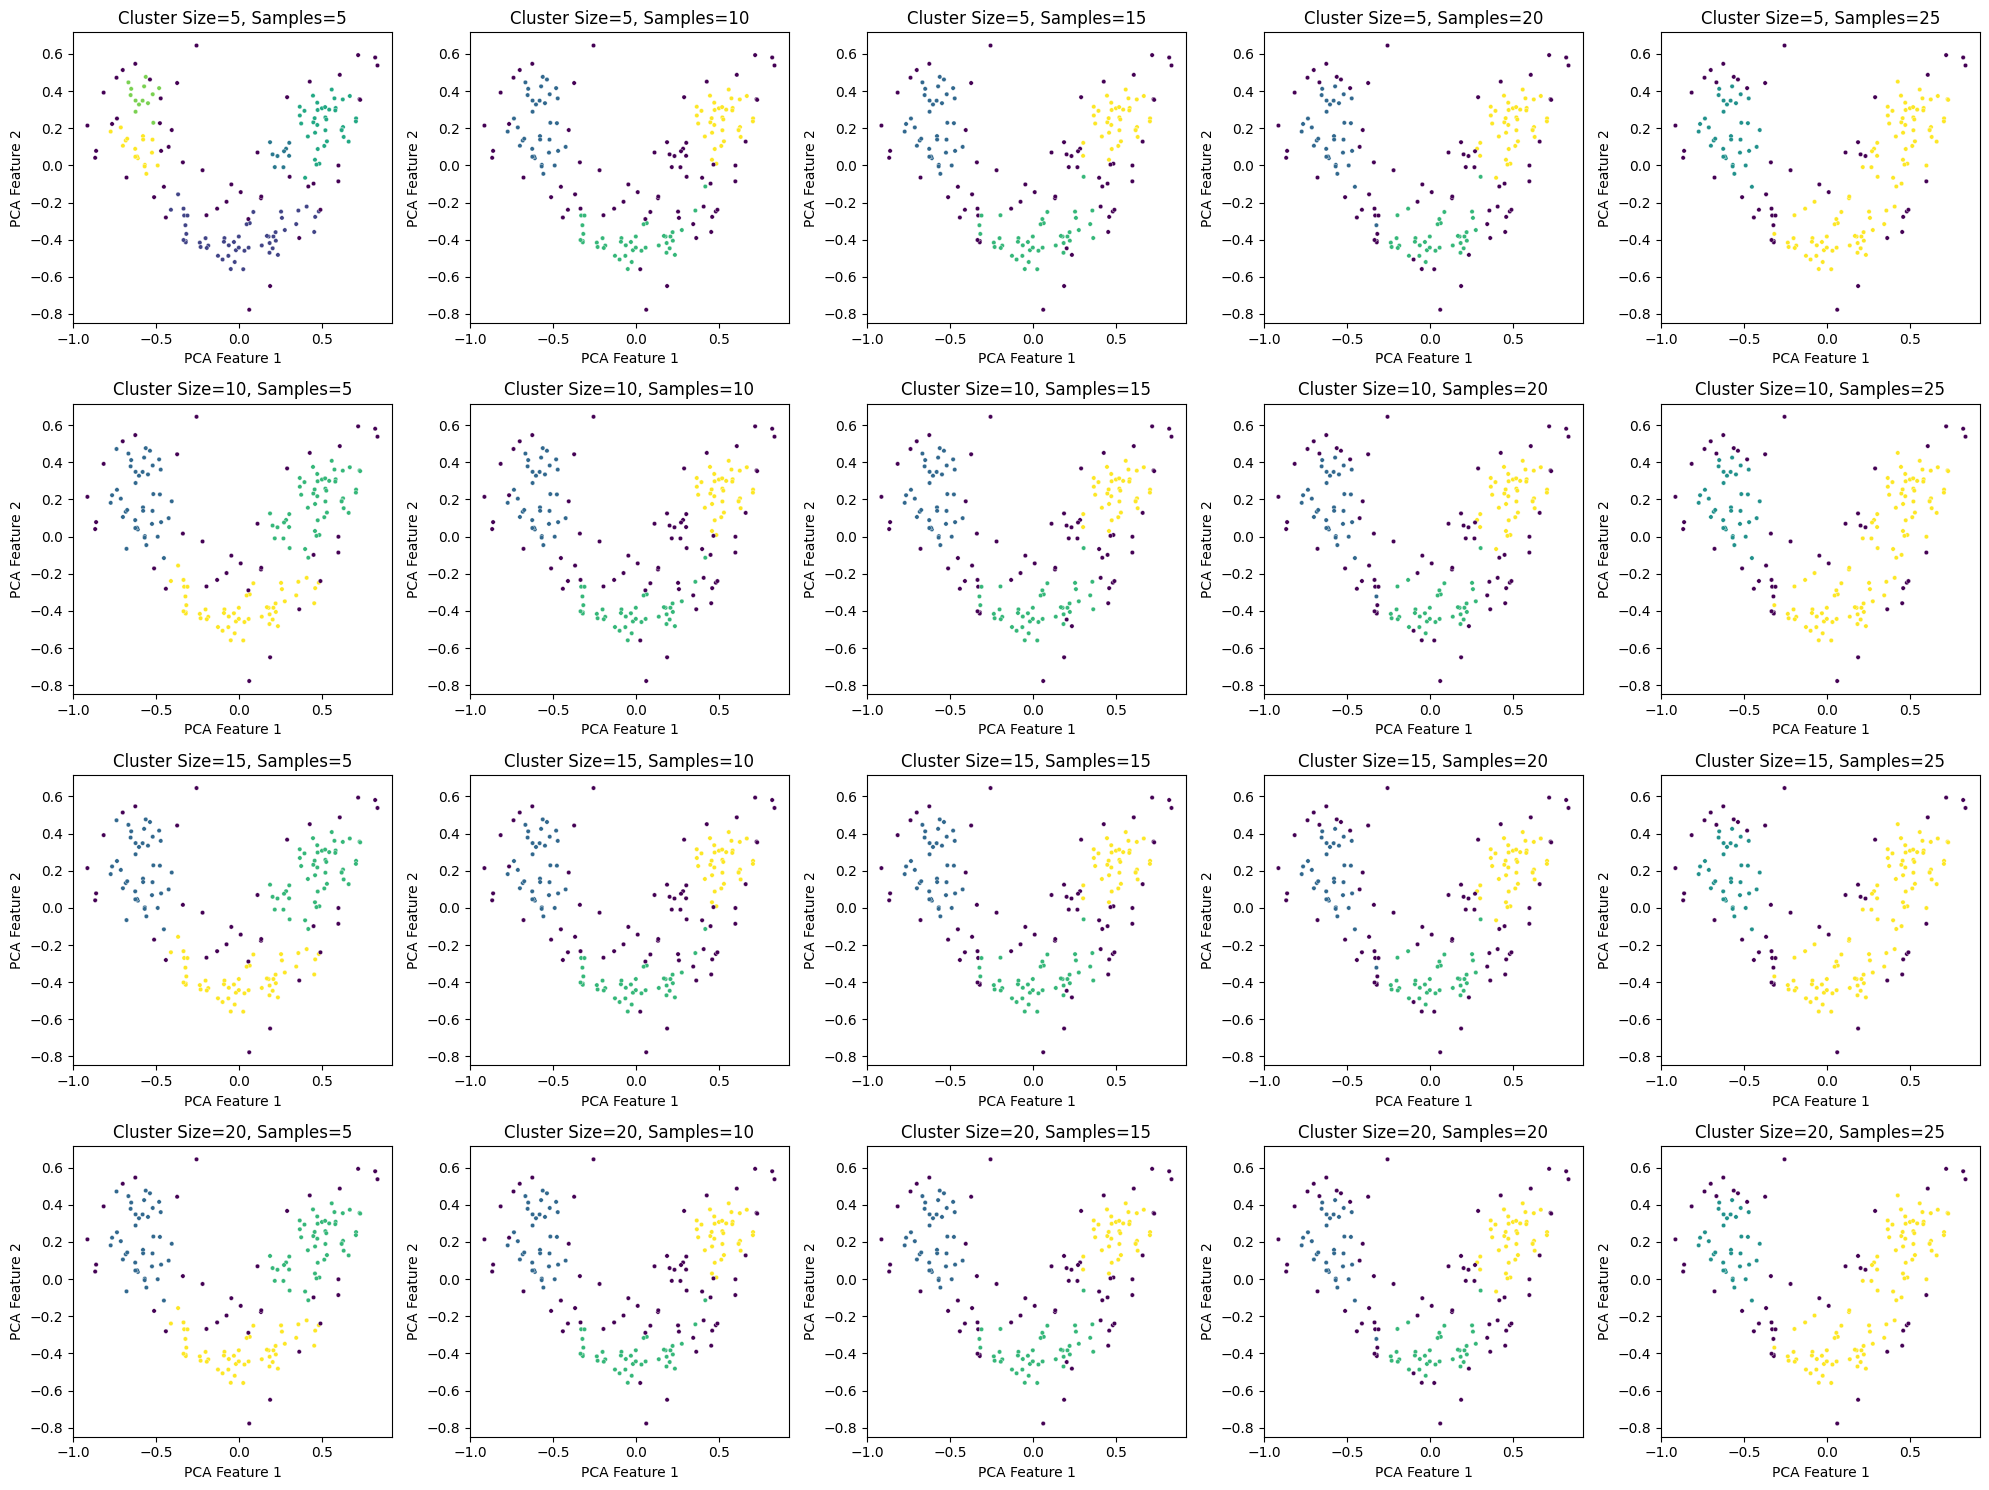

In [ ]:
# Visualize combinations of min_cluster_size and min_samples
min_cluster_size_range = [5, 10, 15, 20]
min_samples_range = [5, 10, 15, 20, 25]

fig, axs = plt.subplots(len(min_cluster_size_range), len(min_samples_range), figsize=(20, 15))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

for i, min_cluster_size in enumerate(min_cluster_size_range):
    for j, min_samples in enumerate(min_samples_range):
        hdbscan_model = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size)
        hdbscan_labels = hdbscan_model.fit_predict(wine_reduced)

        ax = axs[i, j]
        sns.scatterplot(x=wine_reduced[:, 0], y=wine_reduced[:, 1], hue=hdbscan_labels,
                        palette='viridis', ax=ax, s=10, legend=False)
        ax.set_title(f"Cluster Size={min_cluster_size}, Samples={min_samples}")
        ax.set_xlabel('PCA Feature 1')
        ax.set_ylabel('PCA Feature 2')

plt.tight_layout()
plt.show()


In [ ]:
# Experiment with distance and cluster_selection_method
# Define fixed parameter values
min_cluster_size = 10
min_samples = 5

# List of distance metrics to experiment with
metrics = [
    'euclidean',
    'manhattan',
    'chebyshev',
    'canberra',
    'haversine']

# List of cluster selection methods
cluster_selection_methods = ['eom', 'leaf']

results = []

for metric in metrics:
    for method in cluster_selection_methods:
        hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size,
                                         min_samples=min_samples,
                                         metric=metric,
                                         cluster_selection_method=method)
        labels = hdbscan_model.fit_predict(wine_reduced)

        metrics = compute_metrics(wine_reduced, labels, true_labels)

        results.append({
            'min_cluster_size': min_cluster_size,
            'min_samples': min_samples,
            'metric': metric,
            'cluster_selection_method': method,
            **metrics
        })

results_dist = pd.DataFrame(results)

results_dist = results_dist.sort_values(by='Adjusted Rand Index', ascending=False)

results_dist.head(10)

,min_cluster_size,min_samples,metric,cluster_selection_method,Adjusted Rand Index,Silhouette Score,V-measure,Davies-Bouldin Score,Calinski-Harabasz Score,Fowlkes-Mallows Score,Adjusted Mutual Info
6,10,5,canberra,eom,0.676148,0.447878,0.715370,1.475194,226.946632,0.778309,0.709817
7,10,5,canberra,leaf,0.676148,0.447878,0.715370,1.475194,226.946632,0.778309,0.709817
4,10,5,chebyshev,eom,0.650159,0.378770,0.667736,1.605402,104.995504,0.759280,0.663019
0,10,5,euclidean,eom,0.646833,0.382456,0.660143,1.607856,106.272986,0.756891,0.655317
8,10,5,haversine,eom,0.607007,0.366961,0.642407,1.569942,113.040026,0.728069,0.637352
2,10,5,manhattan,eom,0.597069,0.294191,0.624342,1.395813,75.059005,0.720619,0.617413
1,10,5,euclidean,leaf,0.395481,0.092554,0.513901,1.237728,43.769591,0.581531,0.502391
9,10,5,haversine,leaf,0.381081,0.093233,0.505631,1.228090,43.709826,0.571877,0.493901
3,10,5,manhattan,leaf,0.374924,0.151200,0.511129,1.284453,42.240456,0.556174,0.497983
5,10,5,chebyshev,leaf,0.334070,0.062431,0.477836,1.205523,36.980557,0.544525,0.465179


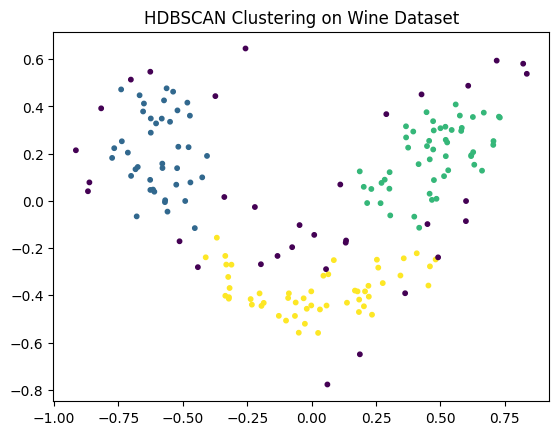

In [ ]:
# Visualize optimal parameter settings of HDBSCAN on wine dataset
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5)
hdbscan_labels = clusterer.fit_predict(wine_reduced)

plt.scatter(wine_reduced[:, 0], wine_reduced[:, 1], c=hdbscan_labels, cmap='viridis', s=10)
plt.title('HDBSCAN Clustering on Wine Dataset')
plt.show()

## Two Moons Dataset

In [ ]:
# Load the Two Moons dataset
X, true_labels_moons = make_moons(n_samples=500, noise=0.1)

# Standardize the data
moons_scaled = scaler.fit_transform(X)

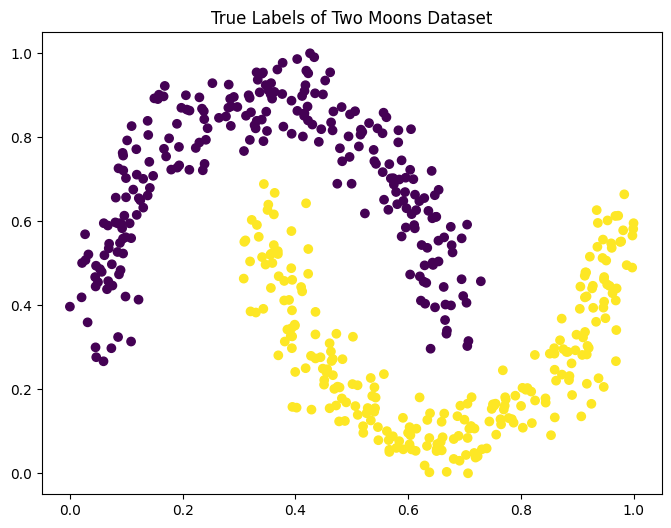

In [ ]:
# Visualize the true labels
plt.figure(figsize=(8, 6))
plt.scatter(moons_scaled[:, 0], moons_scaled[:, 1], c=true_labels_moons, cmap='viridis')
plt.title('True Labels of Two Moons Dataset')
plt.show()


In [ ]:
min_cluster_size = 10  # Set min_cluster_size to 5
min_samples_values = [5, 10, 15, 20, 25]

results = []

for min_samples in min_samples_values:
    hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size,
                                     min_samples=min_samples)
    labels = hdbscan_model.fit_predict(moons_scaled)

    metrics = compute_metrics(moons_scaled, labels, true_labels_moons)

    results.append({
        'min_cluster_size': min_cluster_size,
        'min_samples': min_samples,
        **metrics
    })

moons_min_samples = pd.DataFrame(results)
moons_min_samples = moons_min_samples.sort_values(by='Adjusted Rand Index', ascending=False)

moons_min_samples.head(10)

,min_cluster_size,min_samples,Adjusted Rand Index,Silhouette Score,V-measure,Davies-Bouldin Score,Calinski-Harabasz Score,Fowlkes-Mallows Score,Adjusted Mutual Info
0,10,5,0.996008,0.013228,0.990682,11.585886,210.437703,0.997998,0.990650
2,10,15,0.961087,0.284841,0.933996,1.788299,221.658250,0.980312,0.933810
1,10,10,0.948868,0.274248,0.909608,1.777854,227.319914,0.974049,0.909358
3,10,20,0.929577,0.269356,0.884047,2.015581,232.672727,0.964078,0.883735
4,10,25,0.879588,0.268869,0.825262,2.169084,246.175145,0.937758,0.824813


In [ ]:
min_samples = 5  # Set min_samples to 5
min_cluster_size_values = [5, 10, 15, 20, 25]

results = []

for min_cluster_size in min_cluster_size_values:
    hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size,
                                     min_samples=min_samples)
    labels = hdbscan_model.fit_predict(moons_scaled)

    metrics = compute_metrics(moons_scaled, labels, true_labels_moons)

    results.append({
        'min_cluster_size': min_cluster_size,
        'min_samples': min_samples,
        **metrics
    })

moons_min_cluster_size = pd.DataFrame(results)
moons_min_cluster_size = moons_min_cluster_size.sort_values(by='Adjusted Rand Index', ascending=False)  # Change sorting based on your preference

moons_min_cluster_size.head(10)

,min_cluster_size,min_samples,Adjusted Rand Index,Silhouette Score,V-measure,Davies-Bouldin Score,Calinski-Harabasz Score,Fowlkes-Mallows Score,Adjusted Mutual Info
1,10,5,0.996008,0.013228,0.990682,11.585886,210.437703,0.997998,0.990650
2,15,5,0.996008,0.013228,0.990682,11.585886,210.437703,0.997998,0.990650
3,20,5,0.996008,0.013228,0.990682,11.585886,210.437703,0.997998,0.990650
4,25,5,0.996008,0.013228,0.990682,11.585886,210.437703,0.997998,0.990650
0,5,5,0.957142,0.161403,0.923726,2.260049,154.773611,0.978295,0.923385


In [ ]:
# Identify best parameters combination
min_cluster_size_range = [5, 10, 15, 20, 25, 30]
min_samples_range = [5, 10, 15, 20]

best_ari = -np.inf
best_params = {}

for min_cluster_size in min_cluster_size_range:
    for min_samples in min_samples_range:
        hdbscan_model = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size)
        hdbscan_labels = hdbscan_model.fit_predict(moons_scaled)

        ari_score = adjusted_rand_score(true_labels_moons, hdbscan_labels)

        if ari_score > best_ari:
            best_ari = ari_score
            best_params = {'min_cluster_size': min_cluster_size, 'min_samples': min_samples}

print(f"Best parameters: {best_params} with ARI score: {best_ari:.4f}")


Best parameters: {'min_cluster_size': 10, 'min_samples': 5} with ARI score: 0.9960


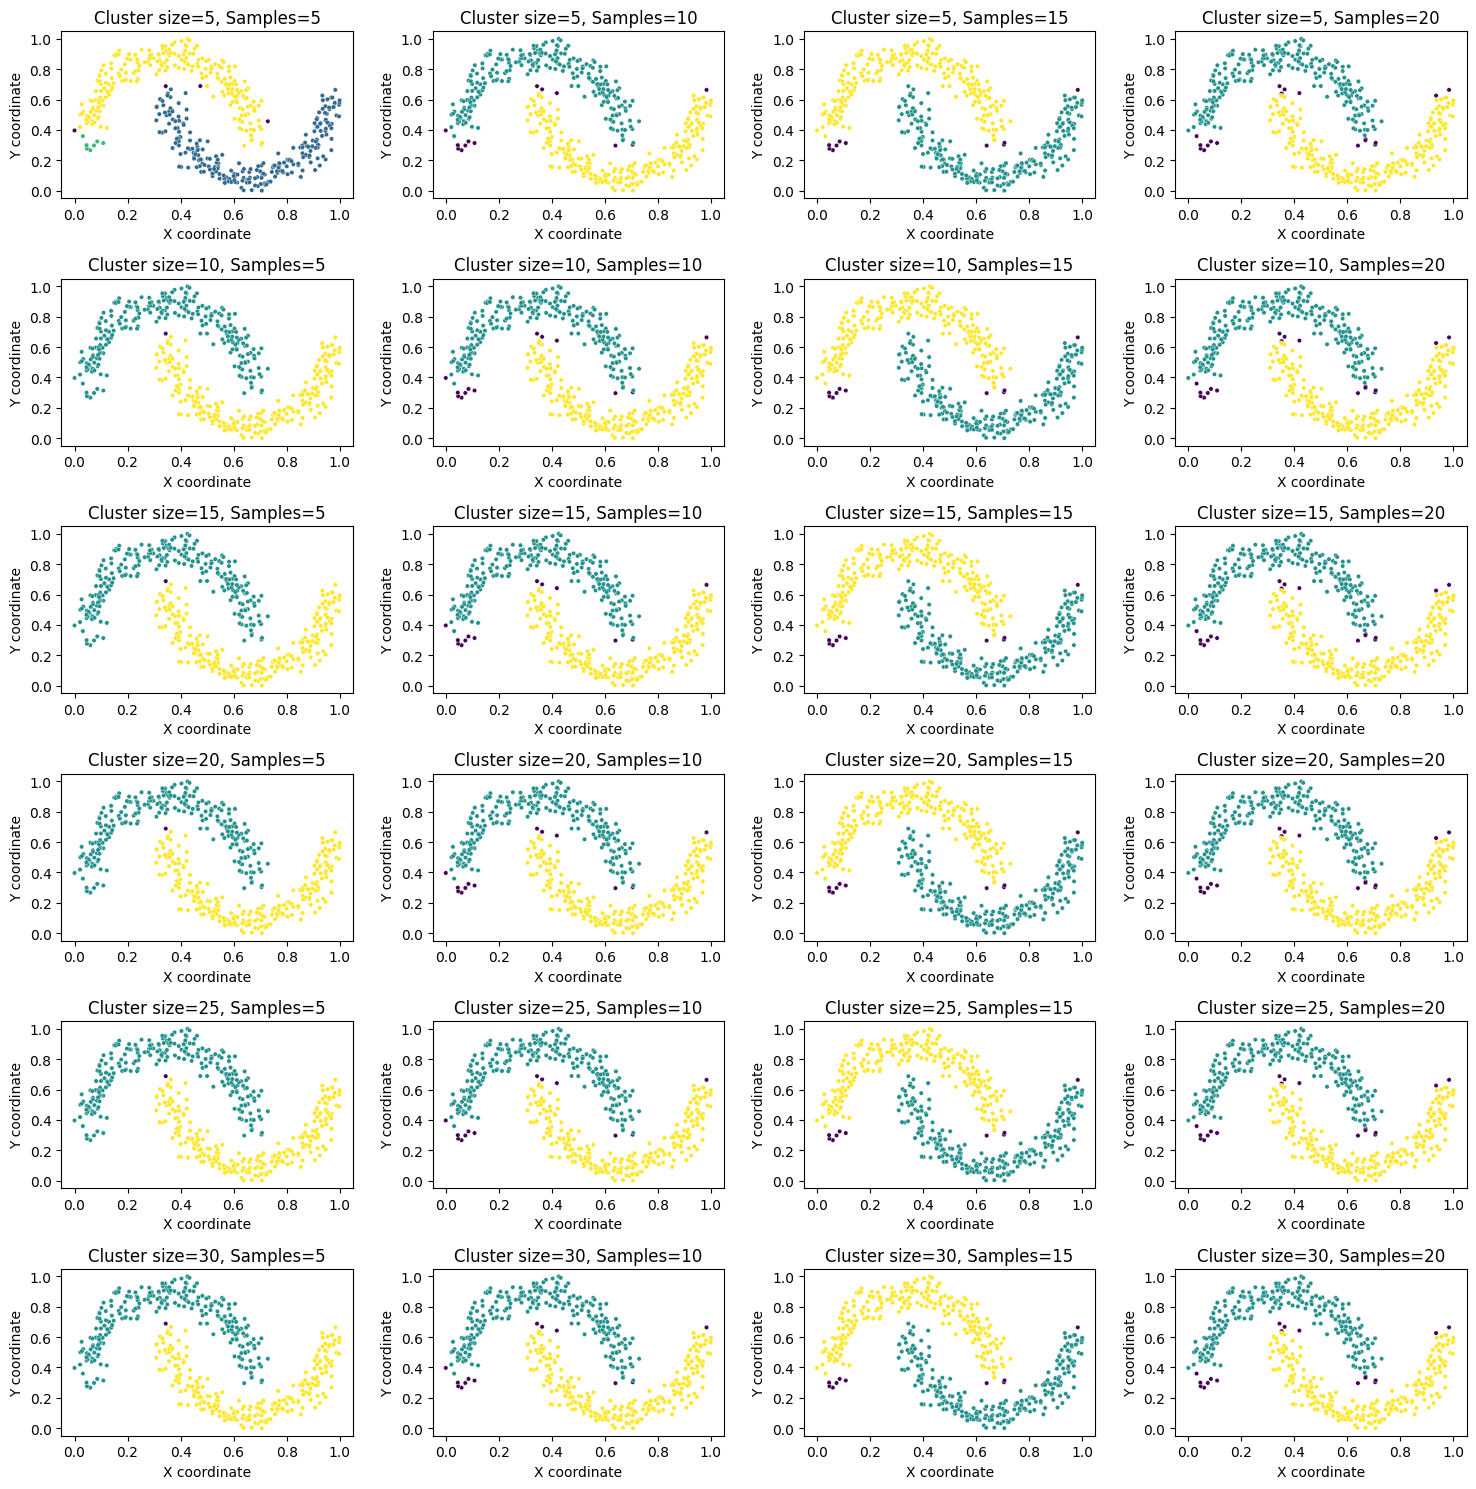

In [ ]:
min_cluster_size_range = [5, 10, 15, 20, 25, 30]
min_samples_range = [5, 10, 15, 20]

fig, axs = plt.subplots(len(min_cluster_size_range), len(min_samples_range), figsize=(15, 15))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

for i, min_cluster_size in enumerate(min_cluster_size_range):
    for j, min_samples in enumerate(min_samples_range):
        hdbscan_model = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size)
        hdbscan_labels = hdbscan_model.fit_predict(moons_scaled)

        ax = axs[i, j]
        sns.scatterplot(x=moons_scaled[:, 0], y=moons_scaled[:, 1], hue=hdbscan_labels,
                        palette='viridis', ax=ax, s=10, legend=False)
        ax.set_title(f"Cluster size={min_cluster_size}, Samples={min_samples}")
        ax.set_xlabel('X coordinate')
        ax.set_ylabel('Y coordinate')

plt.tight_layout()
plt.show()

In [ ]:
# Define fixed parameter values
min_cluster_size = 10
min_samples = 5

# List of distance metrics to experiment with
metrics = [
    'euclidean',
    'manhattan',
    'chebyshev',
    'canberra',
    'haversine'
]

# List of cluster selection methods
cluster_selection_methods = ['eom', 'leaf']

results = []

for metric in metrics:
    for method in cluster_selection_methods:
        hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size,
                                         min_samples=min_samples,
                                         metric=metric,
                                         cluster_selection_method=method)
        labels = hdbscan_model.fit_predict(moons_scaled)

        metrics_results = compute_metrics(moons_scaled, labels, true_labels_moons)

        results.append({
            'min_cluster_size': min_cluster_size,
            'min_samples': min_samples,
            'metric': metric,
            'cluster_selection_method': method,
            **metrics_results
        })

results_dist_moons = pd.DataFrame(results)

results_dist_moons = results_dist_moons.sort_values(by='Adjusted Rand Index', ascending=False)

results_dist_moons.head(10)

,min_cluster_size,min_samples,metric,cluster_selection_method,Adjusted Rand Index,Silhouette Score,V-measure,Davies-Bouldin Score,Calinski-Harabasz Score,Fowlkes-Mallows Score,Adjusted Mutual Info
0,10,5,euclidean,eom,0.996008,0.013228,0.990682,11.585886,210.437703,0.997998,0.990650
2,10,5,manhattan,eom,0.992000,0.183085,0.979533,1.693687,211.808673,0.995984,0.979463
8,10,5,haversine,eom,0.980072,0.212734,0.953329,1.610216,209.056063,0.989974,0.953178
4,10,5,chebyshev,eom,0.948676,0.221943,0.907875,2.732374,211.801828,0.973950,0.907621
6,10,5,canberra,eom,0.300942,0.034183,0.403990,2.642006,87.644890,0.557071,0.399623
3,10,5,manhattan,leaf,0.100283,0.024435,0.309256,1.417378,53.738855,0.399442,0.302896
9,10,5,haversine,leaf,0.072173,-0.019576,0.294502,1.471548,54.836447,0.379521,0.288099
7,10,5,canberra,leaf,0.057489,-0.062292,0.279803,1.708374,37.878329,0.379729,0.272726
1,10,5,euclidean,leaf,0.049921,-0.073100,0.274158,1.529076,39.097707,0.380943,0.266939
5,10,5,chebyshev,leaf,0.042578,-0.106735,0.262421,1.435500,36.737598,0.406042,0.255248


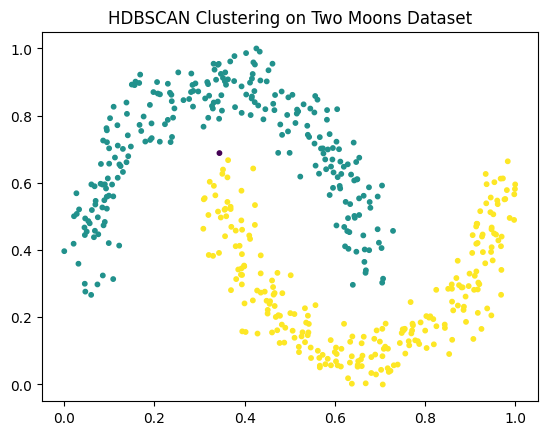

In [ ]:
# Visualize optimal parameter settings of HDBSCAN on two moons dataset
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5, metric='euclidean', cluster_selection_method='eom')
hdbscan_labels = clusterer.fit_predict(moons_scaled)

plt.scatter(moons_scaled[:, 0], moons_scaled[:, 1], c=hdbscan_labels, cmap='viridis', s=10)
plt.title('HDBSCAN Clustering on Two Moons Dataset')
plt.show()

In [ ]:
hdbscan.dist_metrics.METRIC_MAPPING


{'euclidean': hdbscan.dist_metrics.EuclideanDistance,
 'l2': hdbscan.dist_metrics.EuclideanDistance,
 'minkowski': hdbscan.dist_metrics.MinkowskiDistance,
 'p': hdbscan.dist_metrics.MinkowskiDistance,
 'manhattan': hdbscan.dist_metrics.ManhattanDistance,
 'cityblock': hdbscan.dist_metrics.ManhattanDistance,
 'l1': hdbscan.dist_metrics.ManhattanDistance,
 'chebyshev': hdbscan.dist_metrics.ChebyshevDistance,
 'infinity': hdbscan.dist_metrics.ChebyshevDistance,
 'seuclidean': hdbscan.dist_metrics.SEuclideanDistance,
 'mahalanobis': hdbscan.dist_metrics.MahalanobisDistance,
 'wminkowski': hdbscan.dist_metrics.WMinkowskiDistance,
 'hamming': hdbscan.dist_metrics.HammingDistance,
 'canberra': hdbscan.dist_metrics.CanberraDistance,
 'braycurtis': hdbscan.dist_metrics.BrayCurtisDistance,
 'matching': hdbscan.dist_metrics.MatchingDistance,
 'jaccard': hdbscan.dist_metrics.JaccardDistance,
 'dice': hdbscan.dist_metrics.DiceDistance,
 'kulsinski': hdbscan.dist_metrics.KulsinskiDistance,
 'rogerst